<a href="https://colab.research.google.com/github/Paolo20224/Messi-Vs-Ronaldo-Stats/blob/main/Messi__vs_CR7_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# Comenzamos el ejercicio importanto la informacion
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

filename = '/content/MessiRonaldo.xlsx'
df = pd.read_excel(filename)
df.head()

,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins
0,2017-18,Messi,34,12,36,2996,6,2,10,783
1,2017-18,Ronaldo,26,5,27,2297,15,3,13,1170
2,2016-17,Messi,37,9,34,2832,11,2,9,810
3,2016-17,Ronaldo,25,6,29,2544,12,5,13,1200
4,2015-16,Messi,26,16,33,2729,6,1,7,630


In [91]:
#Una vez cargada la informacion, verificamos los tipos de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Season      18 non-null     object
 1   Player      18 non-null     object
 2   Liga_Goals  18 non-null     int64 
 3   Liga_Asts   18 non-null     int64 
 4   Liga_Aps    18 non-null     int64 
 5   Liga_Mins   18 non-null     int64 
 6   CL_Goals    18 non-null     int64 
 7   CL_Asts     18 non-null     int64 
 8   CL_Aps      18 non-null     int64 
 9   CL_Mins     18 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 1.5+ KB


In [92]:
df2=df
df2["Season"]=df2["Season"].replace(["2017-18","2016-17","2015-16","2014-15","2013-14","2012-13","2011-12","2010-11","2009-10"],["17-18","16-17","15-16","14-15","13-14","12-13","11-12","10-11","09-10"])
df2["Season"]

0     17-18
1     17-18
2     16-17
3     16-17
4     15-16
5     15-16
6     14-15
7     14-15
8     13-14
9     13-14
10    12-13
11    12-13
12    11-12
13    11-12
14    10-11
15    10-11
16    09-10
17    09-10
Name: Season, dtype: object

In [93]:
#Debemos considerar que uno de los datos más relevantes para este tipo de jugadores es nivel promedio de anotacion por partido, tanto en competencias de Liga como Champions League
df2=df
df2["Goals_Rate_liga"]=df2["Liga_Goals"]/(df2["Liga_Mins"]/90)
df2["Goals_Rate_cl"]=df2["CL_Goals"]/(df2["CL_Mins"]/90)
df2.head()

,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins,Goals_Rate_liga,Goals_Rate_cl
0,17-18,Messi,34,12,36,2996,6,2,10,783,1.021362,0.689655
1,17-18,Ronaldo,26,5,27,2297,15,3,13,1170,1.018720,1.153846
2,16-17,Messi,37,9,34,2832,11,2,9,810,1.175847,1.222222
3,16-17,Ronaldo,25,6,29,2544,12,5,13,1200,0.884434,0.900000
4,15-16,Messi,26,16,33,2729,6,1,7,630,0.857457,0.857143


In [94]:
#A continuacion realizaremos un filtro sobre cada jugador y su media de anotacion por partido, en este caso para Messi
df3=df2
player_filter = df2['Player']== "Messi"
df3 = df2.loc[player_filter, :]
df3.sort_values(by=["Season"], ascending=False)
df3.groupby(['Season'])[['Goals_Rate_liga']].mean()

,Goals_Rate_liga
Season,
09-10,1.077086
10-11,0.974843
11-12,1.376147
12-13,1.574743
13-14,1.008807
14-15,1.146667
15-16,0.857457
16-17,1.175847
17-18,1.021362


In [95]:
#A continuacion realizaremos un filtro sobre cada jugador y su media de anotacion por partido, en este caso para Cristiano Ronaldo
df4=df2
player_filter = df2['Player']== "Ronaldo"
df4 = df2.loc[player_filter, :]
df4.sort_values(by=["Season"], ascending=False)
df4.groupby(['Season'])[['Goals_Rate_liga']].mean()

,Goals_Rate_liga
Season,
09-10,0.950447
10-11,1.235415
11-12,1.234715
12-13,1.126657
13-14,1.099724
14-15,1.395349
15-16,0.989322
16-17,0.884434
17-18,1.018720


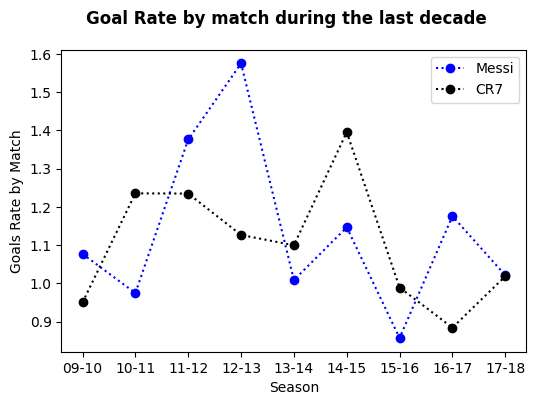

In [126]:
# A continuacion realizaremos un grafico para evaluar visualmente el promedio de anotacion por partido en la liga, para cada jugador.

df3=df3.sort_values(by=["Season"], ascending=True)
df4=df4.sort_values(by=["Season"], ascending=True)

import matplotlib.pyplot as plt
fig = plt.figure(dpi=100)

fig.suptitle("Goal Rate by match during the last decade", fontsize=12, fontweight="bold")

plt.plot(df3["Season"], df3["Goals_Rate_liga"], "bo:",label="Messi")
plt.plot(df4["Season"], df4["Goals_Rate_liga"], "ko:",label="CR7")
plt.legend(loc="upper right")
plt.ylabel("Goals Rate by Match")
plt.xlabel("Season")
plt.show()